#Linear Regresssion with Study Hours Dataset

 ### 1) Import dataset and libraries






"Study Hours" Dataset: https://www.kaggle.com/datasets/himanshunakrani/student-study-hours

In [35]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt #data visualization
import sklearn.model_selection #test train splitting
import numpy as np #data preparation
import sklearn.linear_model #modelling
import sklearn.metrics #model optimization

In [2]:
#Import dataset
df = pd.read_csv('score.csv')

### 2) Exploring the data

In [4]:
df.head()
#There are two columns in the dataset named as 'Hours' and 'Scores'

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.shape
#There are only 25 rows and two columns in the dataset

(25, 2)

In [7]:
df.info()
#This dataset does not contain null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


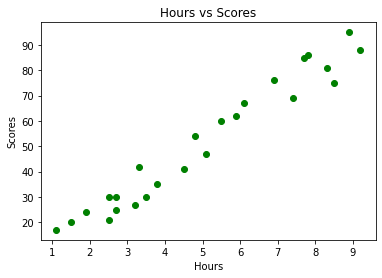

In [10]:
#Visualization
plt.scatter(x = df['Hours'],
            y = df['Scores'], 
            color = 'green') #change the color of the plot

plt.xlabel('Hours') #add label as 'Hours' to the x-line
plt.ylabel('Scores') #add label as 'Scores' to the y-line
plt.title('Hours vs Scores') #add title to the plot

plt.show()

We can see that there is a linear relationship between two variables, therefore we can apply a simple linear model such as simple linear regression to this dataset.

### 3) Data Preparation

In [11]:
x = df['Hours'] #independent variable
y = df['Scores'] #dependent variable

In [78]:
#Split the dataset into two as train and test (80%: train, 20%: test) 
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, train_size = 0.8)

In [83]:
#Check one of the datasets
print(x_train)

0     2.5
21    4.8
16    2.5
19    7.4
4     3.5
22    3.8
20    2.7
18    6.1
7     5.5
5     1.5
17    1.9
2     3.2
9     2.7
14    1.1
1     5.1
10    7.7
12    4.5
24    7.8
8     8.3
11    5.9
Name: Hours, dtype: float64


The train_test_split function shuffled the indexes so that the model can learn better. For further information: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

In [84]:
x_test.shape
#Scikit-learn library will not except the datasets in this shape therefore we will change them into numpy arrays

(5,)

In [85]:
x_train = np.array(x_train).reshape(-1,1)
x_test  = np.array(x_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test  = np.array(y_test).reshape(-1,1)

We write -1 to the first argument of the reshape function when we do not know the new shape of array or we want the function to calculate the shape of new array instead of us. In this case, the value is inferred from the length of the array and remaining dimensions. For further information: https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

In [86]:
print(type(x_train)) #check the type of x train set
x_train.shape #check the shape of x train set

<class 'numpy.ndarray'>


(20, 1)

### 4) Model Selection and Training

In [87]:
lin_model = sklearn.linear_model.LinearRegression()

In [89]:
lin_model.fit(x_train, y_train)

LinearRegression()

### 5) Model Evaluation

In [90]:
#Calculate the model predictions for each value in x test set
predictions = lin_model.predict(x_test)
rounded_preds = np.round_(predictions,0) #round the values

In [91]:
#Print the actual and predicted values
for i in range(len(x_test)):
  print(f'{i}: Actual: {y_test[i]} - Prediction: {rounded_preds[i]}')

0: Actual: [95] - Prediction: [91.]
1: Actual: [88] - Prediction: [94.]
2: Actual: [76] - Prediction: [71.]
3: Actual: [42] - Prediction: [34.]
4: Actual: [75] - Prediction: [87.]


In [92]:
#Calculate the performance metrics
r2   = sklearn.metrics.r2_score(y_test, rounded_preds) #R2
mae  = sklearn.metrics.mean_absolute_error(y_test, rounded_preds) #mean absolute error
mse  = sklearn.metrics.mean_squared_error(y_test, rounded_preds) #mean squared error
rmse = sklearn.metrics.mean_squared_error(y_test, rounded_preds, squared=False) #root mean squared error

In [93]:
print('R2:', r2)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

R2: 0.8281890523269834
MAE: 7.0
MSE: 57.0
RMSE: 7.54983443527075


*   R2 = 0.91 means that our model can predict y value with 91% accuracy.
*   MAE = 5.8 means that the average absolute difference between actual values and predicted values is 5.8
*   MSE = 44.2 means that the square of the difference between actual values and predicted values is 44.2 so the root of MSE (which called RMSE) is 6.65. 



In [94]:
hypothesis = rmse/mae
print(hypothesis)

1.07854777646725


####*Hypothesis:* As the difference between RMSE and MAE grows, we claim that the estimated values ​​are getting farther away from the actual values ​​or there may be outliers in the data. Because the RMSE is calculated by squaring, and if the absolute value between the forecast data and the actual data is large, it will enlarge it by its square. 

The difference between rmse and mae is close to 0 and r2 is close to 1, therefore we expect that the model fitted good to the dataset without outliers

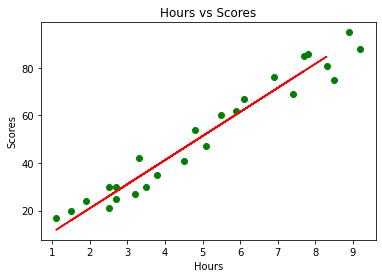

In [95]:
#We can test our hypothesis by plotting the actual and predicted values
x_predictions = lin_model.predict(x_train) #predict train set values

plt.scatter(x = df['Hours'],
            y = df['Scores'], 
            color = 'green') #change the color of the plot
plt.plot(x_train, x_predictions, color = 'red') #put the prediction line to the plot

plt.xlabel('Hours') #add label as 'Hours' to the x-line
plt.ylabel('Scores') #add label as 'Scores' to the y-line
plt.title('Hours vs Scores') #add title to the plot

plt.show()

As we expected, the graph shows us that the model fits well to the data, but before we can take this decision as definitive, we have to consider that the dataset is very small.